In [1]:
#The Scripts folder must be added to the path
import sys
import os
#The script assumes that you are working under the Notebooks directory of the repository
sys.path.append(os.path.abspath(os.path.join('..', 'Scripts')))

## Network retrieval

For network retrieval using OSMnX 2 classes named <code>OSMnXWalkCityRetriever</code> and <code>OSMnXRetrieverPlaces</code> have been implemented. These allow to obtain the street network around the station and also some of the amenities present in the region. Geojson files can be exported with such classes, which will be used in future steps to tag the different walk audit properties obtained from the automated built-in environment analysis.


In [ ]:

from Map_Extraction.OSMnXRetriever import OSMnXWalkCityRetriever
from Map_Extraction.OSMnXRetrieverPlaces import OSMnXRetrieverPlaces

latitude = 25.752761583138444
longitude = -100.29802244505917

#Define the network retriever
retriever = OSMnXWalkCityRetriever()
#Radius around the station
radius = 300
#Obtain the graph of the street network
graph = retriever.getGraphFromCoordinates(latitude, longitude, radius)
#Export the map as a geojson
mapOutputPath = os.path.join('..',"Data/Example_Station/network.geojson")
retriever.exportGeoJSON(graph, mapOutputPath)

#Places export
retrieverPlaces = OSMnXRetrieverPlaces()
placesOutputPath = os.path.join('..',"Data/Example_Station")
retrieverPlaces.exportAllFromPoint(placesOutputPath, latitude, longitude, radius)



You can use the <code>MultiGeoJSONVisualizer</code> class to visualize the network and places layers that were exported in the previous step. 


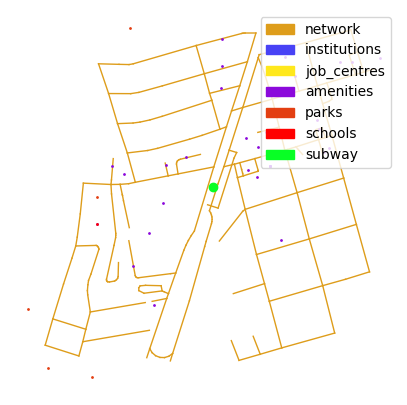

In [2]:
from Map_Extraction.MultiJSONVisualizer import MultiGeoJSONVisualizer

placesOutputPath = os.path.join('..',"Data/Example_Station")
mapOutputPath = os.path.join('..',"Data/Example_Station/network.geojson")

multiLayerVisualizer = MultiGeoJSONVisualizer()

#Layer names and corresponding color codes
#The names should correspond to the geojson files that are going to be visualized

layerNames = ["network", "institutions", "job_centres", "amenities", "parks", "schools", "subway"]
colors = ["#de9d1b", "#4842f5", "#ffe81c", "#8b09db", "#e33f12", "#ff0000", "#08ff25"]

layerFileNames = []
layerFileCompletePaths = []

#Construct 2 arrays one with all file names (e.g. network.geojson) and the other one with the complete paths of the geojson files
for i in range(0,len(layerNames)):
    layerFileName = layerNames[i]+".geojson"
    layerFileNames.append(layerFileName)
    layerFileCompletePaths.append(os.path.join(placesOutputPath, layerFileName))

#Add every layer to the visualizer
for i in range(0,len(layerNames)):
    #For the network we only draw edges, so pointLayer = False
    if(layerNames[i] == "network"):
        layerName = layerNames[i]
        multiLayerVisualizer.addLayer(layerName, layerFileCompletePaths[i], colors[i], pointLayer = False)

    #The rest of the layers are point locations, and we specify pointLayer = True
    else:
        layerName = layerNames[i]
        multiLayerVisualizer.addLayer(layerName, layerFileCompletePaths[i], colors[i], pointLayer = True)


#Visualize the map
widthMap = 5
heightMap = 5
multiLayerVisualizer.setNodeSizeLayer("subway", 6)

multiLayerVisualizer.drawMultiLayer(layerNames, width = widthMap,height = heightMap)



## Street Sampling and Image Collection

The <code>WalkabilityReport</code> class is the interface that is used to retrieve images and tag relevant street view properties to the collected network. 

What we do first is to sample points on the streets where street view images are going to be collected. 

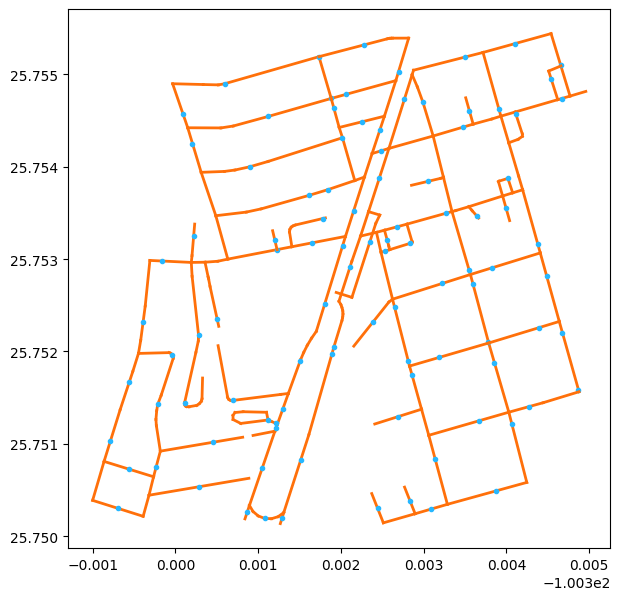

In [3]:
#Create a WalkabilityReport instance
from WalkabilityReport import WalkabilityReport
walkabilityReport = WalkabilityReport(placesOutputPath, "network.geojson", layerFileNames)
edgeColor = "#26b7ff"
walkabilityReport.prepareSampling(pointColor = edgeColor, nodeSize = 3)


In the previous image the blue dots correspond to points where Street View images will be collected. 

## Image collection

In [ ]:
#You need to provide a google api key
googleAPIKey  = ""
walkabilityReport.prepareImages(placesOutputPath, googleAPIKey)

## Computing SVF and GVI

In [4]:
gviPath= os.path.join(placesOutputPath, "GVI_Images")
svfPath = os.path.join(placesOutputPath, "SVF_Images")

resultsDirPath = placesOutputPath
skySegmentationModelPath = os.path.join('..', 'Models/best_deeplabv3plus_resnet101_cityscapes_os16.pth.tar')

walkabilityReport.exportGVIAndSVFResults(gviPath, svfPath, placesOutputPath, skySegmentationModelPath)

## Computing person counts

In [5]:
countModelPath = os.path.join('..',"Models/yolov9c.pt")

walkabilityReport.exportCountData(gviPath, resultsDirPath, countModelPath)

## Computing counts of informal retail stalls

In [6]:
retailerStallsModelPath = os.path.join('..', "Models/stand_detector_105_iters.pt")
walkabilityReport.exportSellerStandData(gviPath, resultsDirPath, retailerStallsModelPath)

## Computing building heights

In [7]:
buildingHeightModelPath = os.path.join("..", "Models/mx_building_detector_105.pt")
walkabilityReport.exportBuildingHeightData(gviPath, resultsDirPath, buildingHeightModelPath)

## Auto-MAPS Walk Audit (non-intersection)
<p style="color: orange;">Warning: This part of the analysis might take more than an hour to run. It is computationally expensive and we still need to work on its optimization. </p>


In [ ]:
#Container Id of the automaps image we provided 
containerId = ""
walkabilityReport.exportAuditData(gviPath, resultsDirPath, containerId)

In [8]:
walkabilityReport.exportAuditSummaryCSV(resultsDirPath)

## Exporting all results

This method will export all images. There's also a way to include those conveniently in a latex file/pdf using the <code>Report Tools class</code>, but i want just to cover basic usage in this notebook, so i won't cover that here. 



sidewalk
road
planter
landscape
trip_hazard
bad_building
good_building
utility_pole
buffer
street_light
seating
walk_signal
crosswalk
curb_ramp
graffiti


/Users/juanlegaria/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/TRB_Escrito_2024/Repo/GSV_Audit_Stations_Pipeline/Scripts/StreetView_Tools/AttributeStreetVisualizer.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize = (width, height), layout = 'constrained')


bike_mark
lightpole
boarded_house
wall
driveway


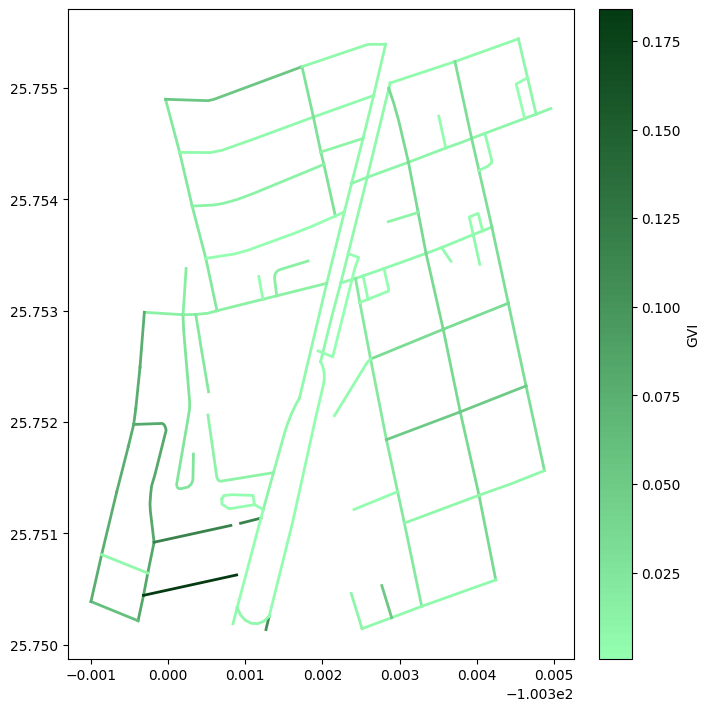

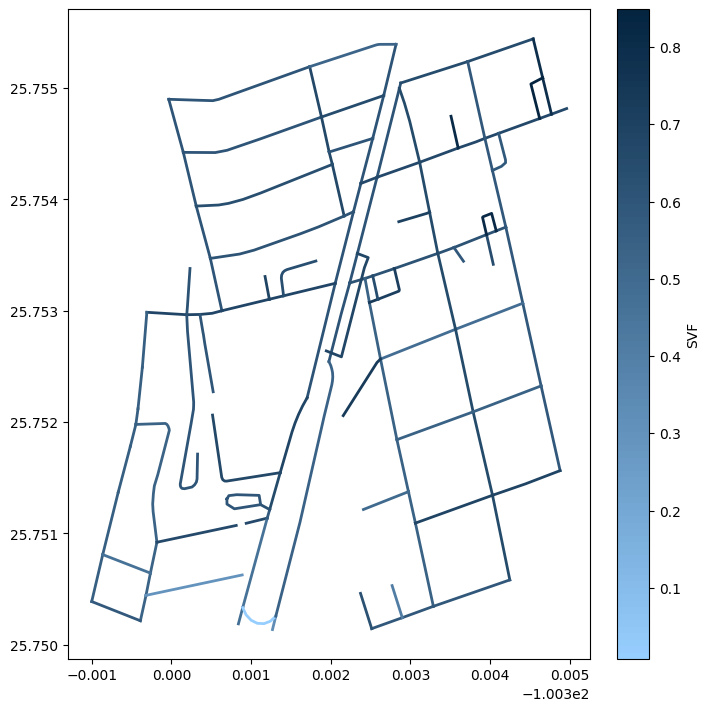

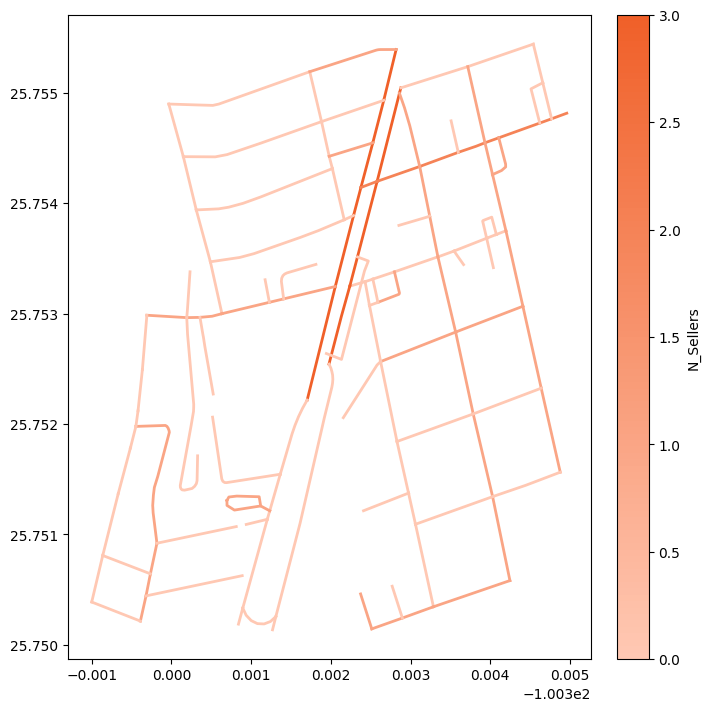

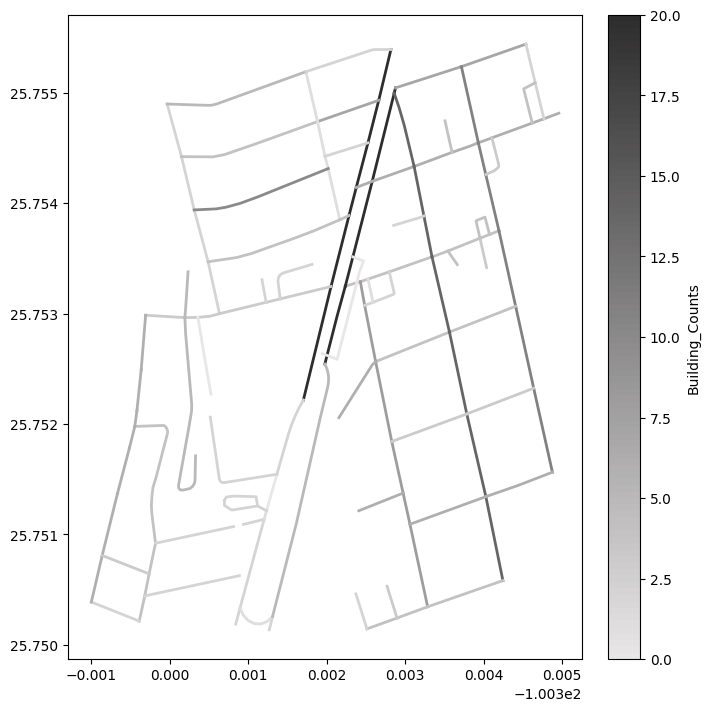

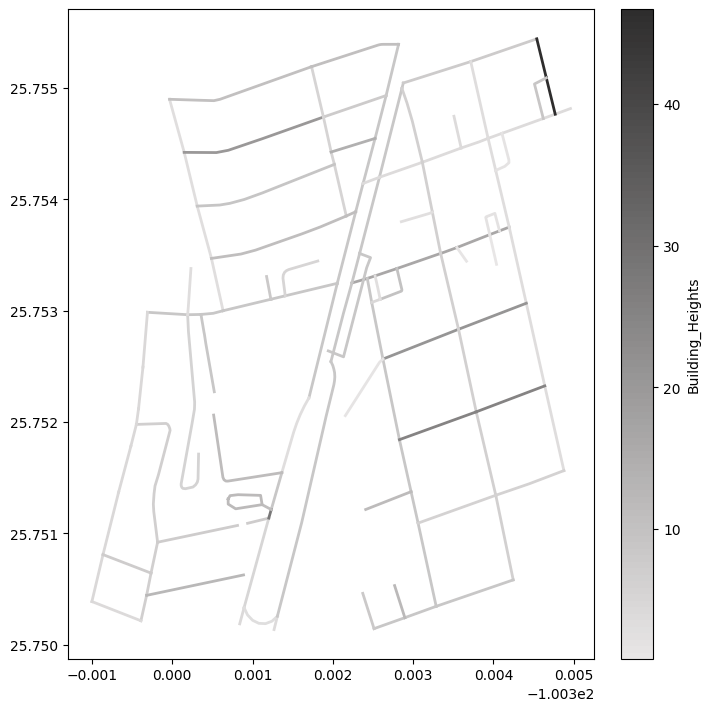

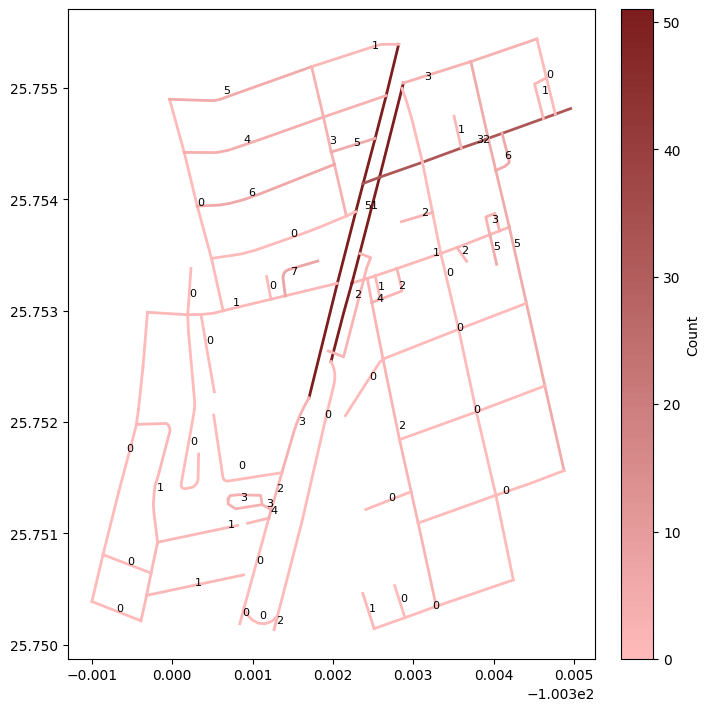

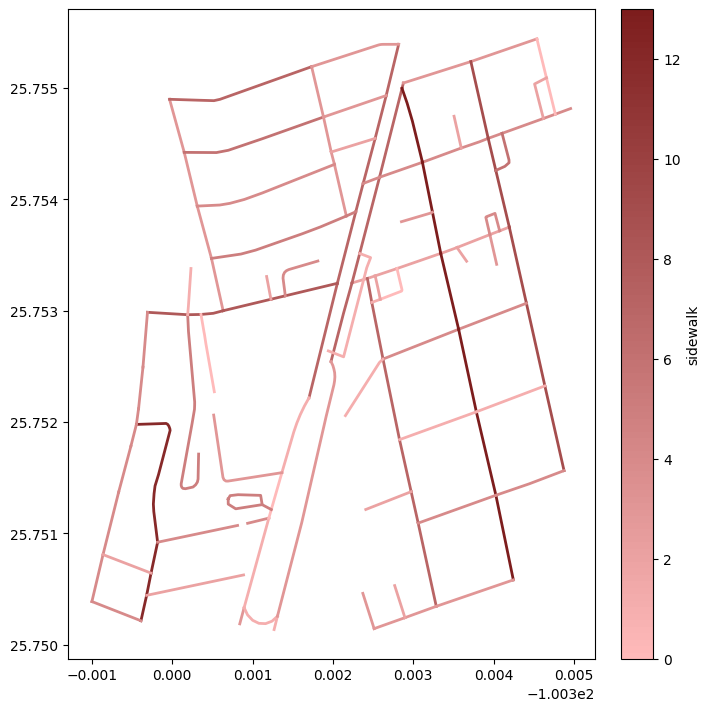

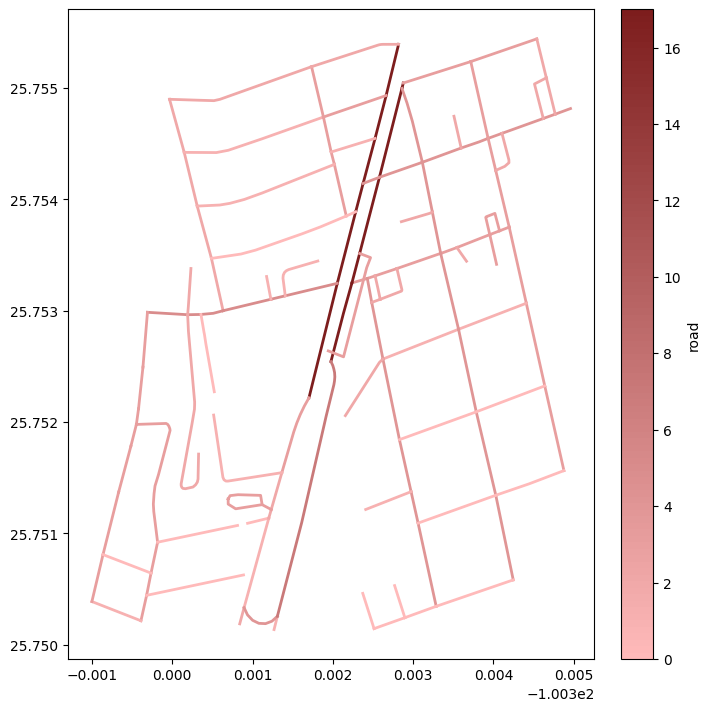

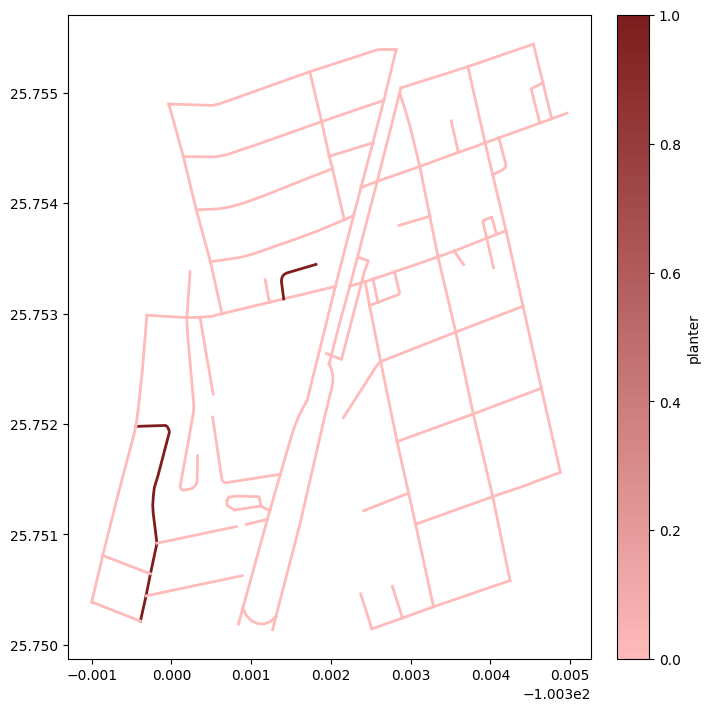

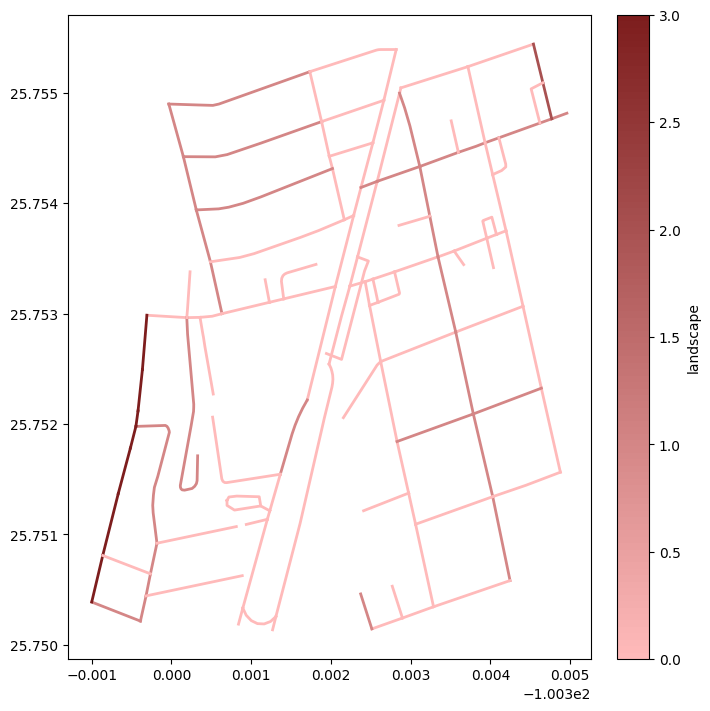

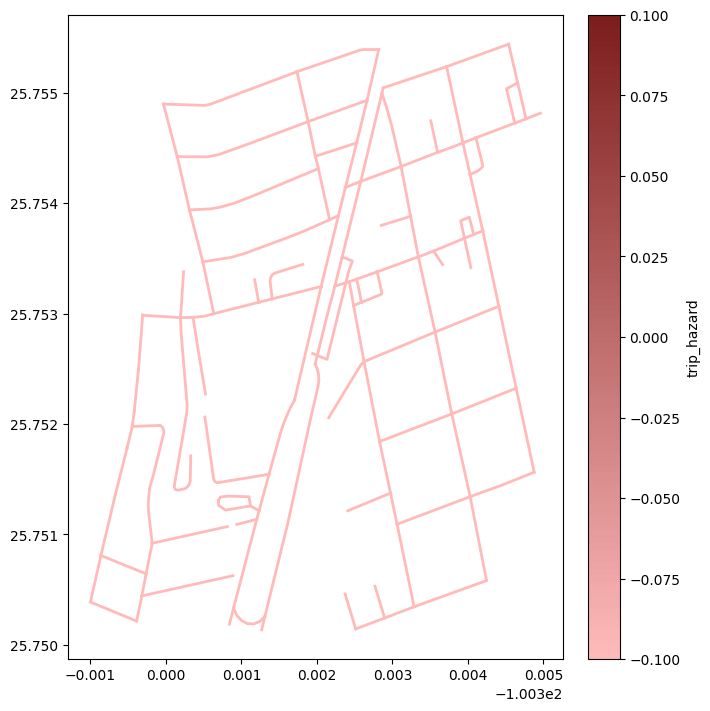

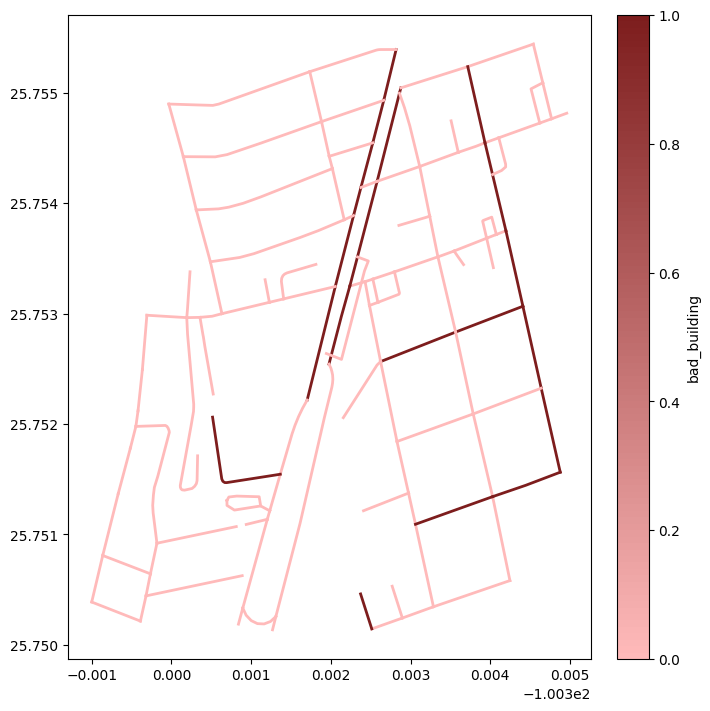

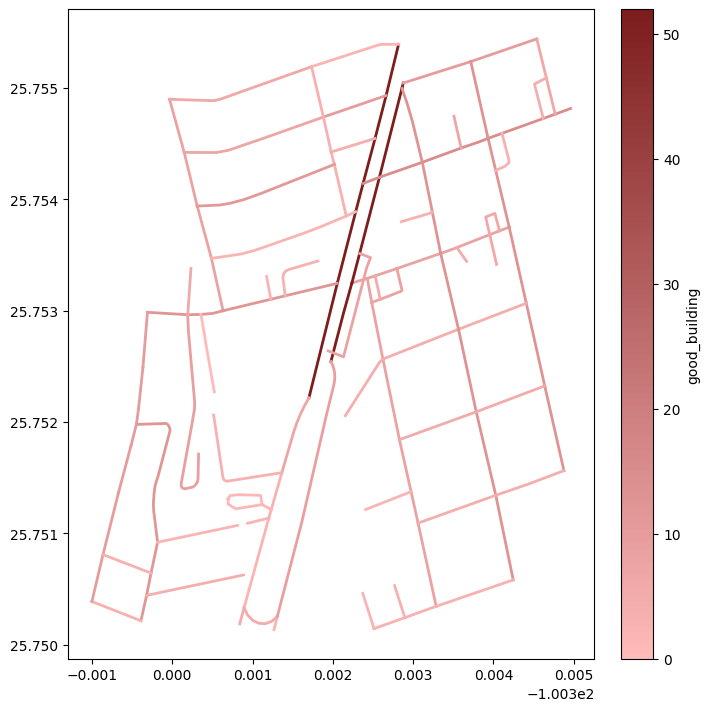

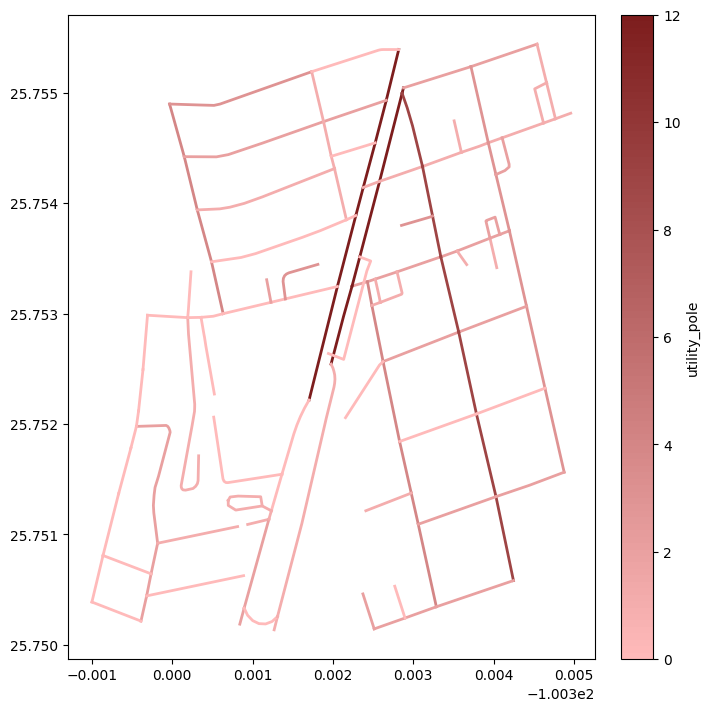

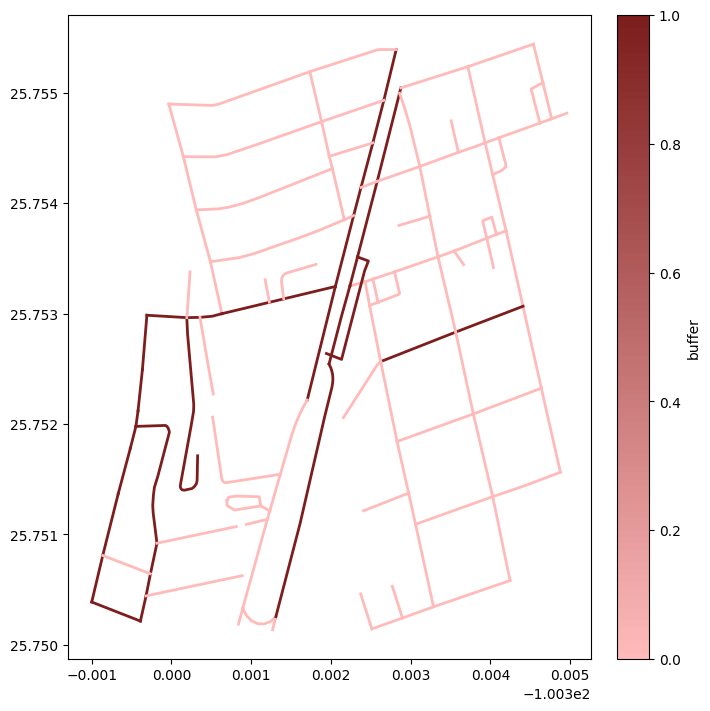

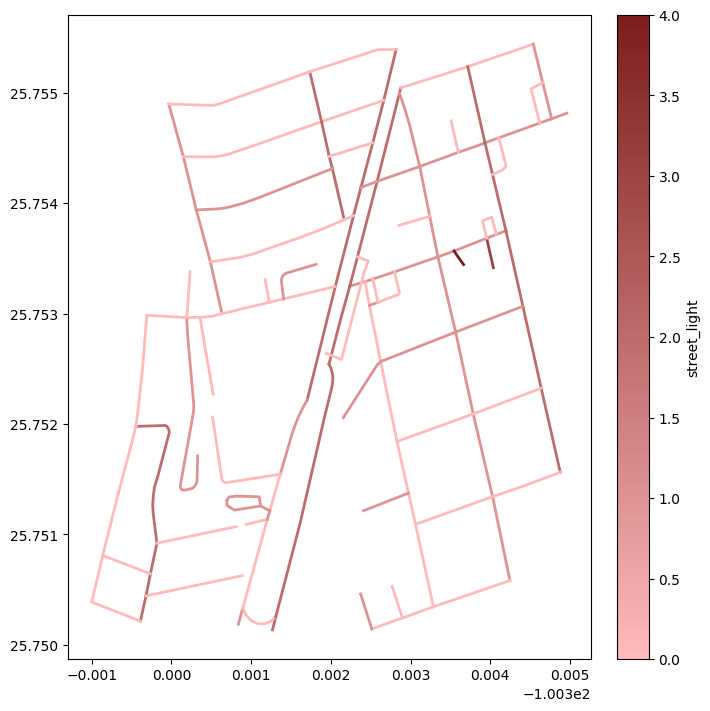

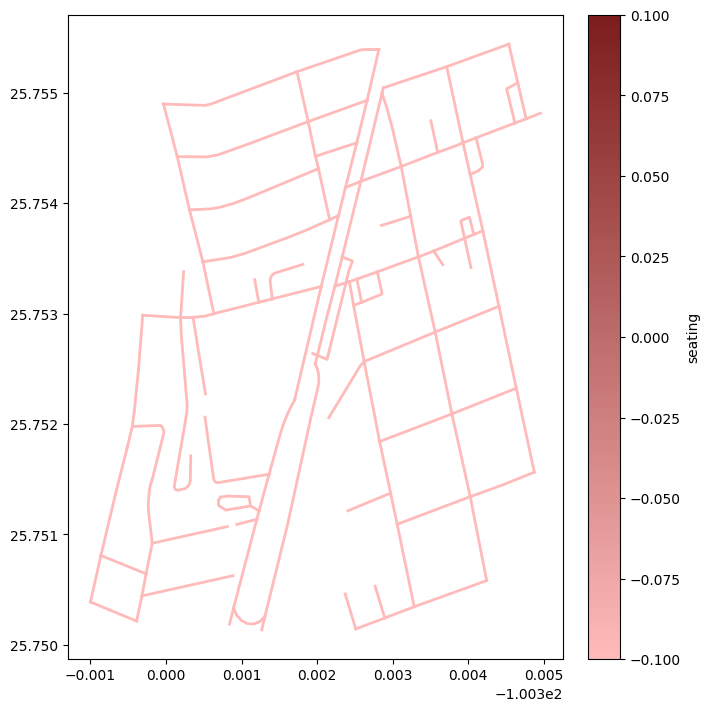

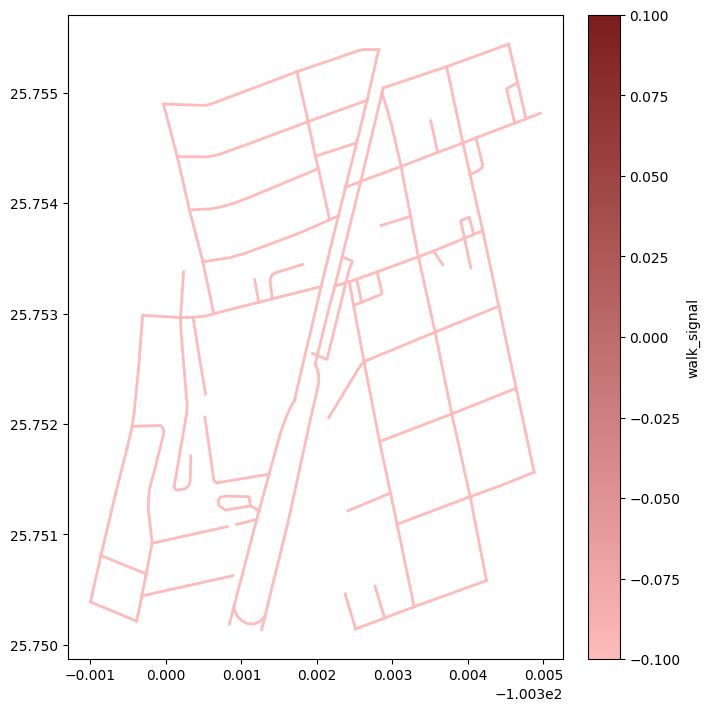

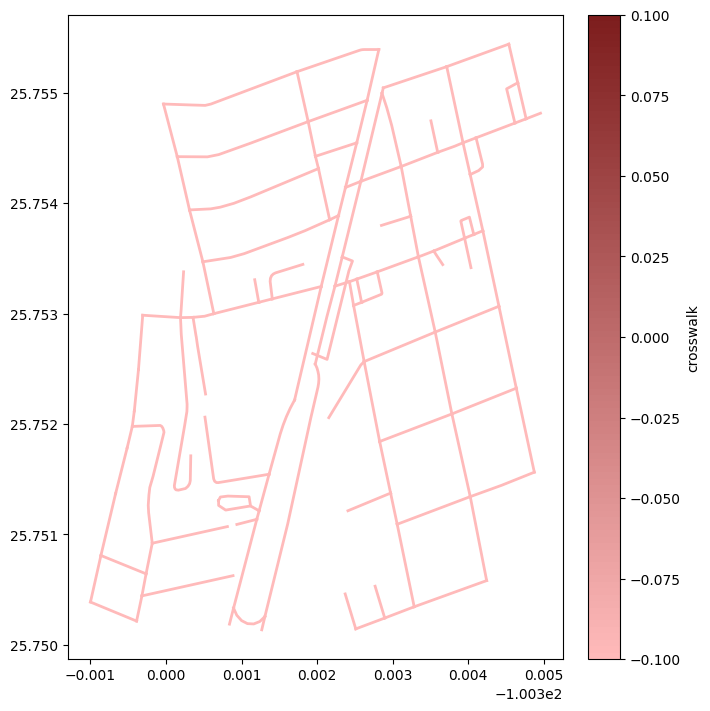

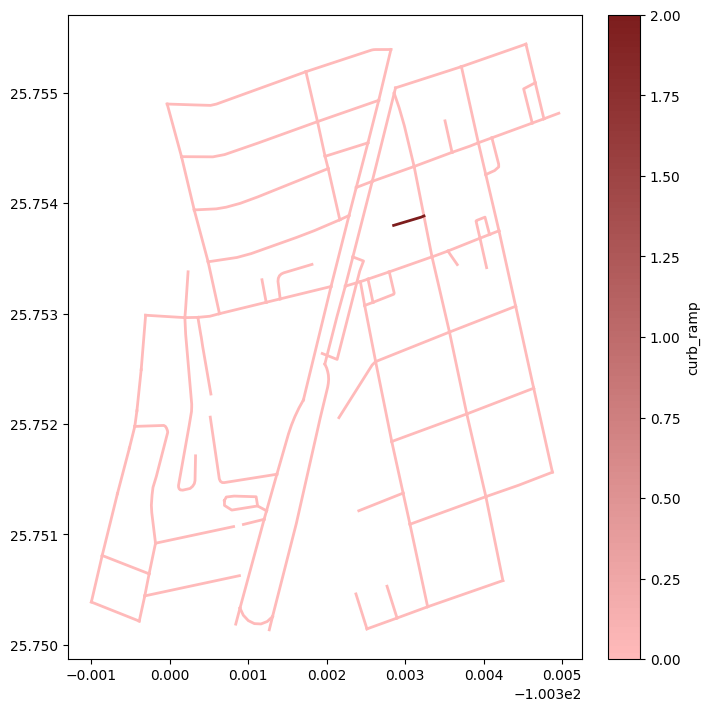

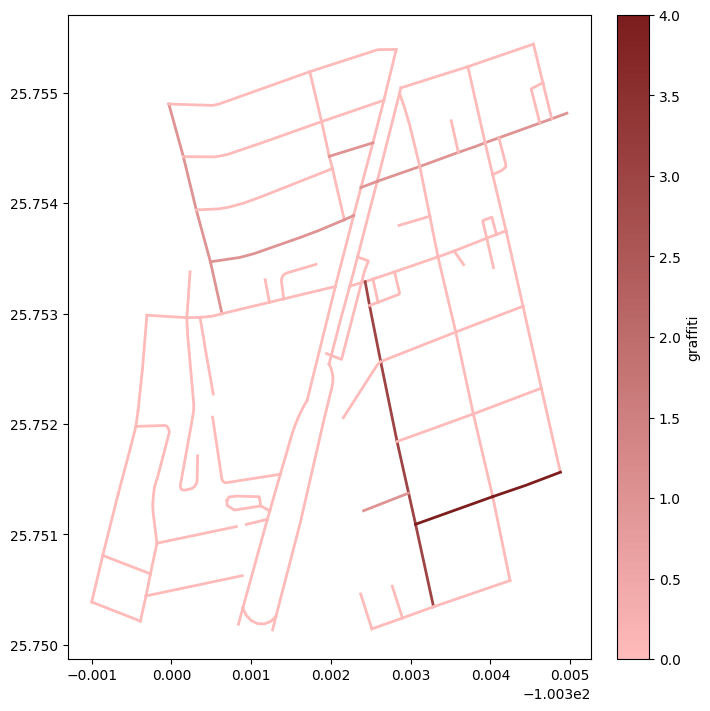

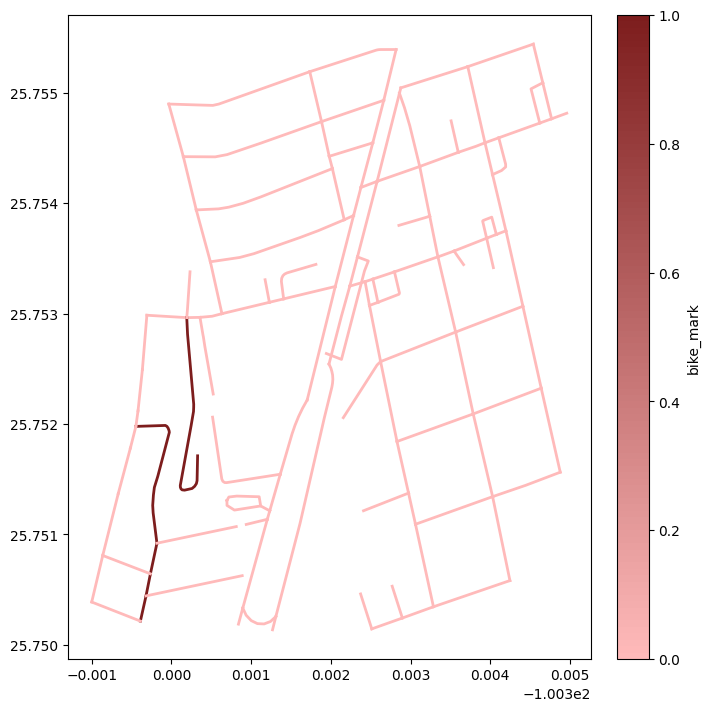

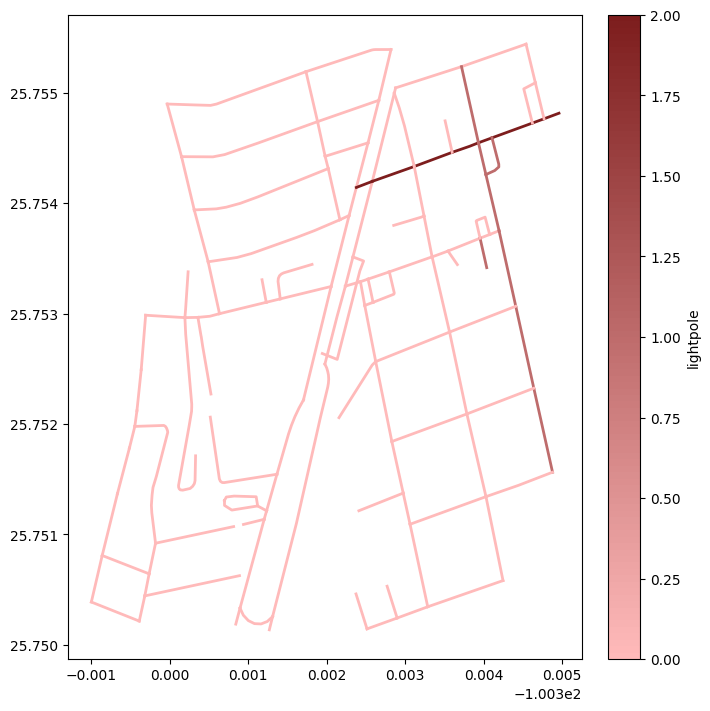

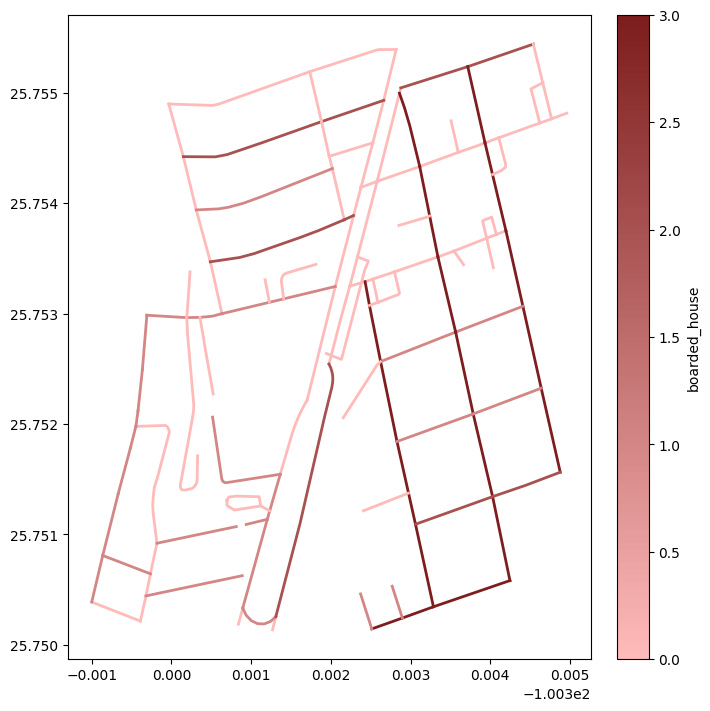

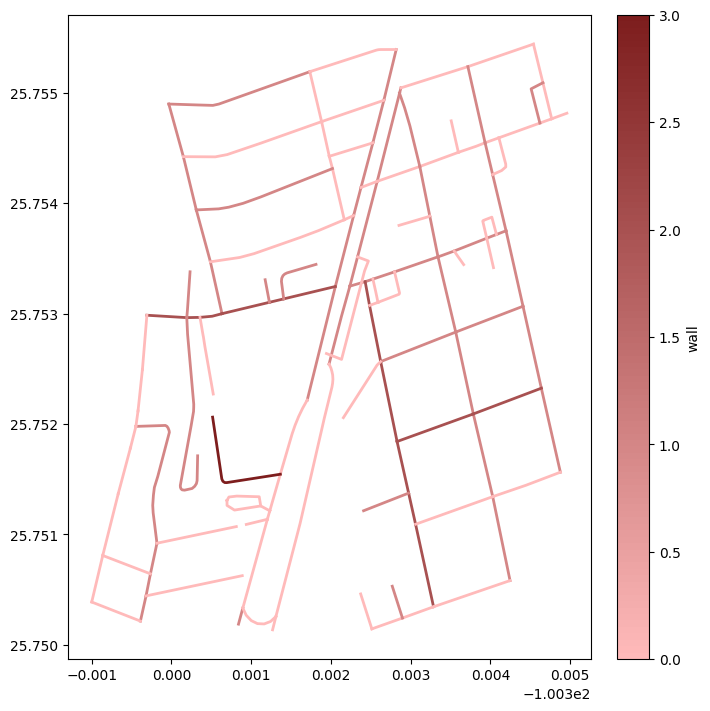

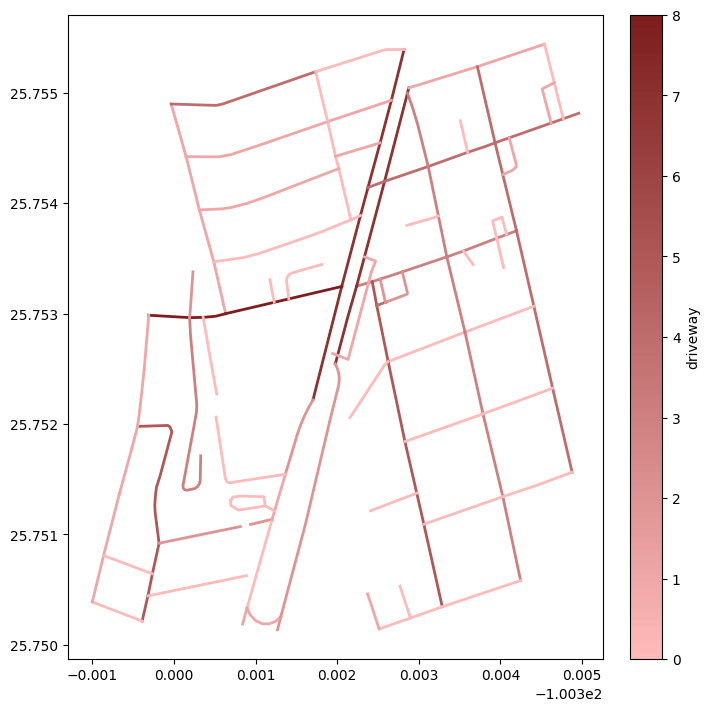

In [9]:
walkabilityReport.compileResults(resultsDirPath)